# Proposal of an anomaly detection solution for Transportico
Authors : Raoul NH (raoul.ngayamhappy@gmail.com)

## 1. Problem statement
Transportico is a transport company carrying food products between two warehouses.

**The company needs to identify anomalies (i.e. unusual activities) that might happen in transporting events**.

For this a dataset of recorded events over a period of 3 months has been provided.

Transportico has also provided a set of rules to be used to trigger anomalous evens. In addition, based on a finer exploration of the data, other anomalies might be spotted.

## 2. Methodology
Anomaly detection 
- Basic data exploration and cleaning
- Anomaly detection using pre-defined client rules
- Anomaly detection using advanced EDA
- Anomaly detection using Statistical / ML techniques

Output should be actionable to be used --> View per day of anomalies + detailed view at day level

## 3. Import used libraries
The study has been carried out using most common data analysis, data visualization and ML libraries: pandas, pandas_profiling, numpy, matplotlib, seaborn, 

If not available on your environment, make sure you install them by copying and executing the following commands:

```
!pip install pandas
```
```
!pip install pandas_profiling[notebook]
```
```
!pip install plotly
```
```
!pip install geopy
```

In [432]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import geopy.distance
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 4. Basic data understanding
The objective is to have at first glance an overview of the data (shape, types, missing values, distribution).

There are 2 general ways to perform this analysis:
- Using pandas functions like shape, dtypes, info, describe
- Using built-in libraries like pandas_profiling, autoviz, dataprep (these libraries provide more detailed info)

### 4.1 Using pandas functions

In [4]:
(
    pd.read_csv("../data/scenarios.csv")
    .head()
)

,_source/data/positionData,_source/data/speedData,_source/data/unit_speedData,_source/data/temperatureData,_source/data/lightData,_source/data/recorded_at,_source/data/unit_temperatureData,_source/data/unit_lightData,_source/data/eventType,_source/data/action,_source/data/eventID
0,"[12.67214, 108.06884]",0.00,KMH,5.50,200,2023-01-01 14:00:00,CEL,LUX,ObjectEvent,OBSERVE,xrlYlV1Pcv_vO_8n4JPyi
1,"[12.65841, 108.03907]",54.95,KMH,2.04,0,2023-01-01 14:13:30,CEL,LUX,ObjectEvent,OBSERVE,dkA2V7_H1L-ZewTbeJbQP
2,"[12.61997, 107.95092]",47.81,KMH,2.96,0,2023-01-01 14:27:00,CEL,LUX,ObjectEvent,OBSERVE,sfUc0dftAes27cZZ4112_
3,"[12.58494, 107.87112]",60.87,KMH,2.45,0,2023-01-01 14:40:30,CEL,LUX,ObjectEvent,OBSERVE,KLECMdIVRtZ6Yqs2lgWsN
4,"[12.54409, 107.79773]",43.06,KMH,2.17,0,2023-01-01 14:54:00,CEL,LUX,ObjectEvent,OBSERVE,ZMiTvOwYlM3bNEgkVy47p


>```The dataset contains a list of recorded events with the following information for each event: event ID, recorded position, recorded date and time, recorded speed of the truck and corresponding unit, recorded temperature in the trailer and corresponding unit, recorded light in the trailer and corresponding unit, event type and action.```

In [5]:
(
    pd.read_csv("../data/scenarios.csv")
    .info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _source/data/positionData          3415 non-null   object 
 1   _source/data/speedData             3415 non-null   float64
 2   _source/data/unit_speedData        3415 non-null   object 
 3   _source/data/temperatureData       3415 non-null   float64
 4   _source/data/lightData             3415 non-null   int64  
 5   _source/data/recorded_at           3415 non-null   object 
 6   _source/data/unit_temperatureData  3415 non-null   object 
 7   _source/data/unit_lightData        3415 non-null   object 
 8   _source/data/eventType             3415 non-null   object 
 9   _source/data/action                3415 non-null   object 
 10  _source/data/eventID               3415 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 293.6+ 

>```
>There are 3415 event entries in the dataset and none is missing a data point, i.e. no need to deal with missing values (deletion, imputation, ...)
>```
>```
>Speed, temperature and light data are numerical, which is consistent with expected. 
>```
>```
>Time of record should be a datetime type. Position data show latitude and longitude but is of object type. 
>For these 2, extra treatment is needed to transform the data to a compliant format.
>```

In [6]:
(
    pd.read_csv("../data/scenarios.csv")
    .nunique()
)

_source/data/positionData             188
_source/data/speedData               2423
_source/data/unit_speedData             1
_source/data/temperatureData          598
_source/data/lightData                  3
_source/data/recorded_at             3410
_source/data/unit_temperatureData       1
_source/data/unit_lightData             1
_source/data/eventType                  1
_source/data/action                     1
_source/data/eventID                 3415
dtype: int64

>```
>All three units data show a unique value, which means that all values for each measure are of the same unit (Km/h, °C and Lux respectively for speed, temperature and light)
>```
>```
>Event type and action show also a unique value and therefore do not discriminate between events.
>```
>```
>These five features can be deleted.
>```

### 4.2 Using built-in libraries
In the example below, pandas_profiling has been used. It provides basic data analysis info in a more user friendly way via a dashboard. 

Same conclusions as above can be drawn

In [7]:
ProfileReport(pd.read_csv("../data/scenarios.csv"), title="Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 5. Data preparation
The objective is to apply some transformations on the data to prepare them for further analysis.

Here are all transformations applied:
- Splitting location coordinates into latitute and longitude features
- Extracting date and time features from recorded datetime
- Dropping useless columns
- Changing data types
- Reindexing columns
- Renaming columns

In [442]:
def prepare_data(data: pd.DataFrame) -> pd.DataFrame:
    """Prepare raw dataframe

        :param data: input DataFrame
        :returns: transformed DataFrame

    """

    return (
        data.copy()
        .assign(
            **{
                "Latitude": lambda df_: df_["_source/data/positionData"].str.split(',').str[0].str.replace("[", ""),
                "Longitude": lambda df_: df_["_source/data/positionData"].str.split(',').str[1].str.replace("]", ""),
                "Date": lambda df_: pd.to_datetime(df_["_source/data/recorded_at"]).dt.date,
                "Time": lambda df_: pd.to_datetime(df_["_source/data/recorded_at"]).dt.time,
                "Hour": lambda df_: pd.to_datetime(df_["_source/data/recorded_at"]).dt.hour,
                "Minute": lambda df_: pd.to_datetime(df_["_source/data/recorded_at"]).dt.minute,
                "TimeMinutes": lambda df_: df_["Hour"] * 60 + df_["Minute"]
            }
        )
        .drop(
            ["_source/data/positionData", 
            "_source/data/unit_speedData", 
            "_source/data/unit_temperatureData", 
            "_source/data/unit_lightData", 
            "_source/data/eventType", 
            "_source/data/action"], 
            axis=1
        )
        .astype(
            {
                "_source/data/recorded_at": "datetime64[ns]",
                "Date": "datetime64[ns]",
                "Latitude": "float",
                "Longitude": "float"
            }
        )
        .sort_values(
            by=["_source/data/recorded_at"]
        )
        .reindex(
            columns=[
                "_source/data/eventID", 
                "_source/data/recorded_at",
                "Date",
                "Time",
                "TimeMinutes",
                "Hour",
                "Minute",
                "Latitude",
                "Longitude",
                "_source/data/speedData",
                "_source/data/temperatureData",
                "_source/data/lightData"
            ]
        )
        .rename(
            columns={
            "_source/data/eventID": "ID", 
            "_source/data/recorded_at": "Datetime",
            "_source/data/speedData": "Speed",
            "_source/data/temperatureData": "Temperature",
            "_source/data/lightData": "Light"
            }
        )
    )

Below is the dataframe obtained after applying above trsnformations

In [444]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
)

,ID,Datetime,Date,Time,TimeMinutes,Hour,Minute,Latitude,Longitude,Speed,Temperature,Light
0,xrlYlV1Pcv_vO_8n4JPyi,2023-01-01 14:00:00,2023-01-01,14:00:00,840,14,0,12.67214,108.06884,0.00,5.50,200
1,dkA2V7_H1L-ZewTbeJbQP,2023-01-01 14:13:30,2023-01-01,14:13:30,853,14,13,12.65841,108.03907,54.95,2.04,0
2,sfUc0dftAes27cZZ4112_,2023-01-01 14:27:00,2023-01-01,14:27:00,867,14,27,12.61997,107.95092,47.81,2.96,0
3,KLECMdIVRtZ6Yqs2lgWsN,2023-01-01 14:40:30,2023-01-01,14:40:30,880,14,40,12.58494,107.87112,60.87,2.45,0
4,ZMiTvOwYlM3bNEgkVy47p,2023-01-01 14:54:00,2023-01-01,14:54:00,894,14,54,12.54409,107.79773,43.06,2.17,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2200,EuPgSWmLUnTNWUsrogwW8,2023-03-31 22:10:54,2023-03-31,22:10:54,1330,22,10,10.48768,107.16279,51.93,2.04,0
2201,A0UuE-SYVjw-tW1kBGgqT,2023-03-31 22:20:43,2023-03-31,22:20:43,1340,22,20,10.51021,107.09660,37.26,0.01,0
2202,AiNNqxc5csIY6mjs4Lm8Q,2023-03-31 22:30:32,2023-03-31,22:30:32,1350,22,30,10.43127,107.15820,36.52,4.05,0
2203,2owKdI7zpINnlIUGChvJ0,2023-03-31 22:40:21,2023-03-31,22:40:21,1360,22,40,10.39718,107.11183,86.67,3.50,0


## 6. Detailed exploration

The objective here is to further explore position features as well as measures (Speed, Temperature, Light) in order to get more insights

### 6.1 Number of records per date
The results show that 94% of dates (78 out of 83) have 40 event records. 
We will use these 78 dates as reference to analyze position, speed, temperature and light.

Detailed analysis of other values will be analyzed later

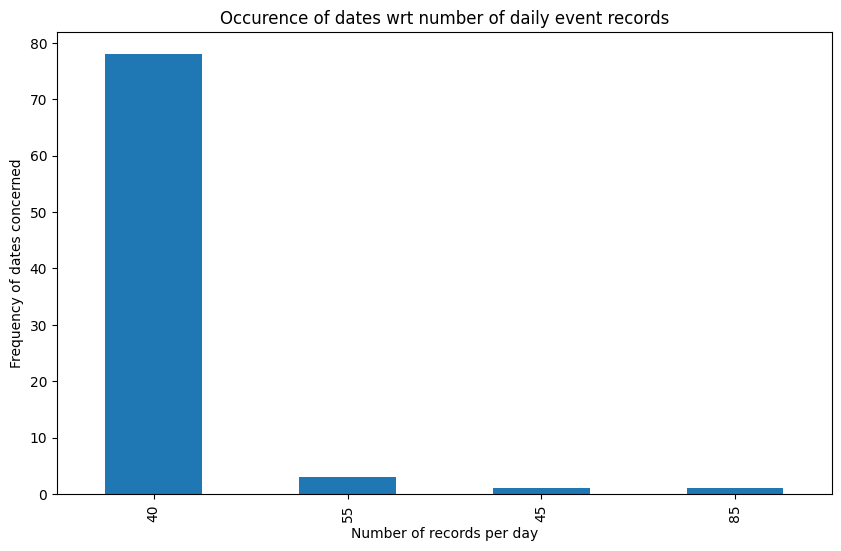

In [412]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    .groupby(["Date"])[["Latitude"]]
    .count()
    .value_counts()
    .reset_index()
    .rename(columns={"Latitude": "Records", 0: "Freq"})
    .plot(
        x="Records", y="Freq",
        kind="bar", 
        xlabel="Number of records per day", 
        ylabel="Frequency of dates concerned",
        figsize=(10,6),
        legend=False,
        title="Occurence of dates wrt number of daily event records"
    )
)
plt.show()

### 6.2 Reference trip coordinates
Analysis of the mean coordinates of a reference trip (average latitude and longitude of each 40 record positions)
The results show that: 
- Reference coordinates at departure are {"LatitudeDeparture": 12.67214, "LongitudeDeparture": 108.06884} 
- Reference coordinates at arrival are {"LatitudeArrival": 10.38960, "LongitudeArrival": 107.08450}

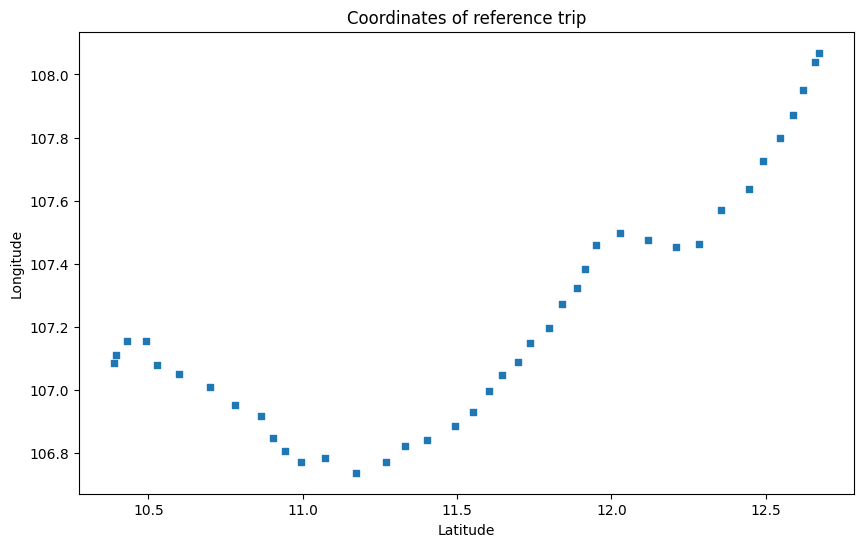

In [413]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    .groupby(["Date"])[["Latitude"]].count().query("`Latitude` == 40")
    .merge(
        prepare_data(pd.read_csv("../data/scenarios.csv")),
        on="Date",
        how="left"
    )
    .drop(
        ["Latitude_x"],
        axis=1
    )
    .rename(columns={"Latitude_y": "Latitude"})
    .groupby(["Time"])[["Latitude", "Longitude"]]
    .agg(["mean"])
    .droplevel(1, axis=1).reset_index()
    .plot(
        x="Latitude", y="Longitude",
        kind="scatter", 
        marker="s",
        xlabel="Latitude", 
        ylabel="Longitude",
        figsize=(10,6),
        legend=False,
        title="Coordinates of reference trip"
    )
)
plt.show()

### 6.3 Reference trip measures
Analysis of the mean measures (mean speed, mean temperature, mean light) of a reference trip (data averaged at each record for all 78 reference dates)
The results show that main pertubations occur at departure and arrival
- At departure and arrival speed is = 0 and temperature is a bit lower than 6°C. Light is 200 Lux at departure (daylight) and a bit lower at arrival, i.e. 180 Lux (Night ?)
- During the trip the mean speed is ~45 Km/h, the mean temperature is ~3°C and the Light is 0 Lux

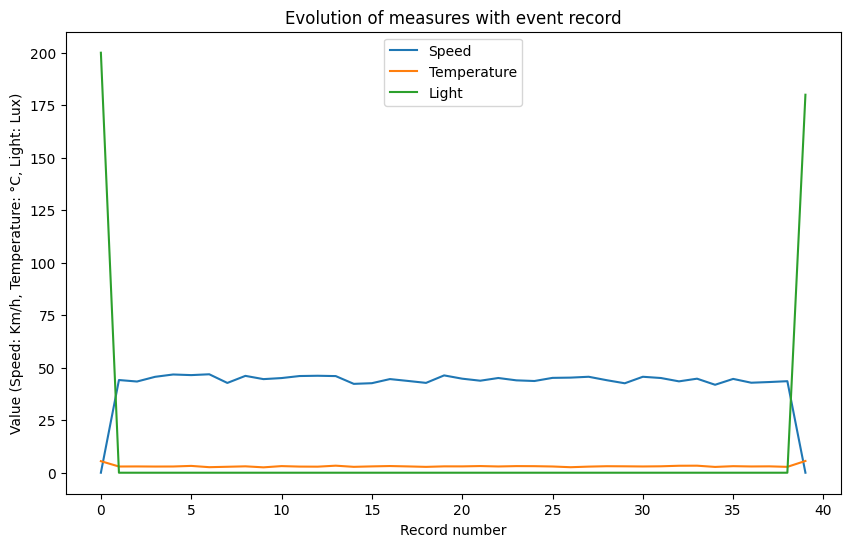

In [414]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    .groupby(["Date"])[["Latitude"]].count().query("`Latitude` == 40")
    .merge(
        prepare_data(pd.read_csv("../data/scenarios.csv")),
        on="Date",
        how="left"
    )
    .drop(
        ["Latitude_x"],
        axis=1
    )
    .rename(columns={"Latitude_y": "Latitude"})
    .groupby(["Time"])[["Speed", "Temperature", "Light"]]
    .agg(["mean"])
    .droplevel(1, axis=1).reset_index()
    # .iloc[1:-1, :]
    # .mean()
    .plot(
        kind="line",
        xlabel="Record number", 
        ylabel="Value (Speed: Km/h, Temperature: °C, Light: Lux)",
        figsize=(10,6),
        title="Evolution of measures with event record"
    )
)
plt.show()

## 7. Rule-based anomaly detection
The objective here is to add to the dataset and for each event results of anomaly detection based on defined client rules on Speed, Temperature and Open doors (equivalent to light in the trailer). 

An additional check for Speed > 0 AND Light > 0 (Doors opened while driving has been added)

Each check is performed using a function that takes as input the transformed dataframe and return a the dataframe with a new column filled with 1 (Anomalous event) or 0 (Normal event)

### 7.0 Used functions

In [449]:
## SPEED ##

def check_speed_anomaly(data: pd.DataFrame) -> pd.DataFrame:
    """Add column with anomalies detected on speed data

        :param data: input DataFrame
        :returns: DataFrame with additional column with results of check

    """
    return (
        data.copy()
        .assign(
            **{
                "SpeedAnomaly": lambda df_: (df_["Speed"] > 80).astype("int")
                # "SpeedAnomaly": lambda df_: df_["Speed"].apply(lambda x: 1 if x > 80 else 0)
            }
        )
    )


## TEMPERATURE ##

def check_temperature_anomaly(data: pd.DataFrame) -> pd.DataFrame:
    """Add column with anomalies detected on temperature data

        :param data: input DataFrame
        :returns: DataFrame with additional column with results of check

    """
    return (
        data.copy()
        .assign(
            **{
                # "TemperatureAnomaly": lambda df_: df_["Temperature"] > 6
                "TemperatureAnomaly": lambda df_: df_["Temperature"].apply(lambda x: 1 if x > 6 else 0)
            }
        )
    )


## DOORS OPENED ##

def check_doors_anomaly(
    data: pd.DataFrame, 
    coordinates: dict, 
    tolerance: float
    ) -> pd.DataFrame:

    """Add column with anomalies detected on trailer door
       Doors are opened when Light > 0
       The anomalous case happens when 
       Light > 0 AND ((Latitude != Latitute at departure AND Longitude != Longitude at departure) (OR Latitude != Latitute at arrival AND Longitude != Longitude at arrival))
       

        :data: input DataFrame
        :coordinates: dictionary with coordinates as
        {
            "LatitudeDeparture": float,
            "LongitudeDeparture": float,
            "LatitudeArrival": float,
            "LongitudeArrival": float
        } 
        tolerance: tolerance such that 0 <= abs(Departure - arrival) <= tolerance

        :returns: DataFrame with additional column with results of check

    """
    def condition(row):
        light = row["Light"] > 0
        departure = (0.0 <= np.abs((row["Latitude"] + row["Longitude"]) - (coordinates["LatitudeDeparture"] + coordinates["LongitudeDeparture"])) <= tolerance)
        arrival = (0.0 <= np.abs((row["Latitude"] + row["Longitude"]) - (coordinates["LatitudeArrival"] + coordinates["LongitudeArrival"])) <= tolerance)
        
        if light:
            if (departure or arrival):
                return 0
            else: return 1
        if not light:
            return 0
            
    return (
        data.copy()
        .assign(
            **{
                "DoorsAnomaly": lambda df_: df_.apply(condition, axis=1)
            }
        )
    )


## CATASTROPHIC ##

def check_catastrophic_anomaly(data: pd.DataFrame) -> pd.DataFrame:
    """Add column with anomalies detected on catastrophic anomaly (light > 0 AND speed > 0, i.e doors opened while driving)

        :param data: input DataFrame
        :returns: DataFrame with additional column with results of check

    """
    return (
        data.copy()
        .assign(
            **{
                "CatastrophicAnomaly": lambda df_: [
                    1 if x > 0 and y > 0 else 0
                    for x, y in df_[["Speed", "Light"]].values
                    ]
            }
        )
    )

### 7.1 Anomalous speed events
Results show that anomalous speed events are observed at 3 specific dates with % of records concerned between 47% and 56%

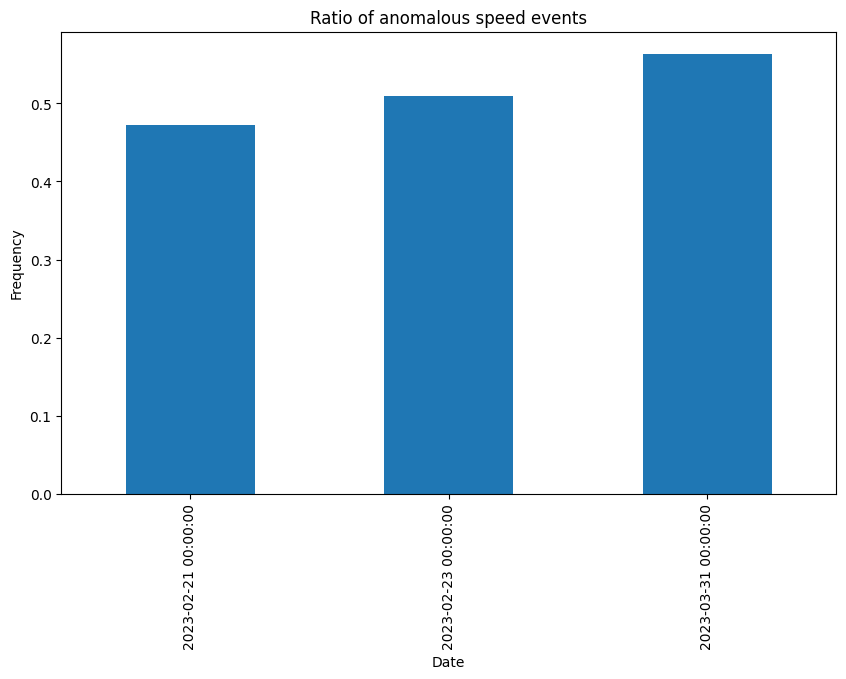

In [416]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    .pipe(check_speed_anomaly)
    .query("`SpeedAnomaly` == 1")
    .groupby(["Date"])["SpeedAnomaly"]
    .agg(["sum"])
    .merge(
        prepare_data(pd.read_csv("../data/scenarios.csv"))
        .groupby(["Date"])["Speed"]
        .agg(["count"]),
        on="Date",
        how="left"
    )
    .reset_index()
    .assign(
        **{
            "Percentage": lambda df_: df_["sum"] / df_["count"]
        }
    )
    .plot(
        kind="bar",
        x="Date",
        y="Percentage",
        xlabel="Date", 
        ylabel="Frequency",
        legend=False,
        figsize=(10,6),
        title="Ratio of anomalous speed events"
    )
    # .transform("sum")
    # .query("'2023-02-21' == `Date`")
)
plt.show()

### 7.2 Anomalous temperature events
Results show that anomalous temperature events are observed at 2 specific dates with % of records concerned between 6% and 11%

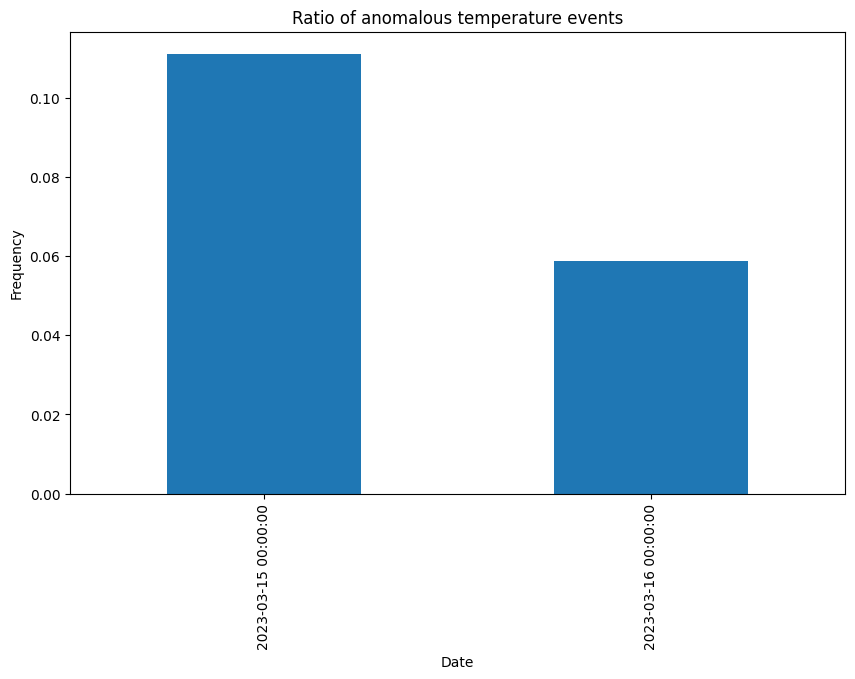

In [417]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    .pipe(check_temperature_anomaly)
    .query("`TemperatureAnomaly` == 1")
    .groupby(["Date"])["TemperatureAnomaly"]
    .agg(["sum"])
    .merge(
        prepare_data(pd.read_csv("../data/scenarios.csv"))
        .groupby(["Date"])["Temperature"]
        .agg(["count"]),
        on="Date",
        how="left"
    )
    .reset_index()
    .assign(
        **{
            "Percentage": lambda df_: df_["sum"] / df_["count"]
        }
    )
    .plot(
        kind="bar",
        x="Date",
        y="Percentage",
        xlabel="Date", 
        ylabel="Frequency",
        legend=False,
        figsize=(10,6),
        title="Ratio of anomalous temperature events"
    )
    # .transform("sum")
    # .query("'2023-02-21' == `Date`")
)
plt.show()

### 7.3 Anomalous door events
Results show that anomalous door events are observed at 2 specific dates with % of records concerned between 6% and 11%.

They happened for same events as anomalous temperature events 

In [418]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    .pipe(
        check_doors_anomaly, 
        coordinates={"LatitudeDeparture": 12.67214, "LongitudeDeparture": 108.06884, "LatitudeArrival": 10.38960, "LongitudeArrival": 107.08450},
        tolerance=0.000005
    )
    .query("`DoorsAnomaly` == 1")
    .groupby(["Date"])["DoorsAnomaly"]
    .agg(["sum"])
    .merge(
        prepare_data(pd.read_csv("../data/scenarios.csv"))
        .groupby(["Date"])["Light"]
        .agg(["count"]),
        on="Date",
        how="left"
    )
    .reset_index()
    .assign(
        **{
            "Percentage": lambda df_: df_["sum"] / df_["count"]
        }
    )
    # .plot(
    #     kind="bar",
    #     x="Date",
    #     y="Percentage",
    #     xlabel="Date", 
    #     ylabel="Frequency",
    #     legend=False,
    #     figsize=(10,6),
    #     title="Ratio of anomalous door events"
    # )
    # .transform("sum")
    # .query("'2023-02-21' == `Date`")
)
# plt.show()

,Date,sum,count,Percentage
0,2023-03-15,5,45,0.111111
1,2023-03-16,5,85,0.058824


### 7.4 Compiling rule-based anomalous events
In order to help Transportico in the monitoring of anomalous events, results are aggregated by date.

In this way, the client can have a first table giving per day the number of anomalous events detected for each type.

If the client wishes to have detailed results for each day (i.e which specific event is concerned at a specific day), a second table is proposed.

Below are the two tables

,SpeedAnomaly,TemperatureAnomaly,DoorsAnomaly
Date,,,
2023-01-01,0,0,0
2023-01-02,0,0,0
2023-01-03,0,0,0
2023-01-04,0,0,0
2023-01-05,0,0,0
...,...,...,...
2023-03-27,0,0,0
2023-03-28,0,0,0
2023-03-29,0,0,0


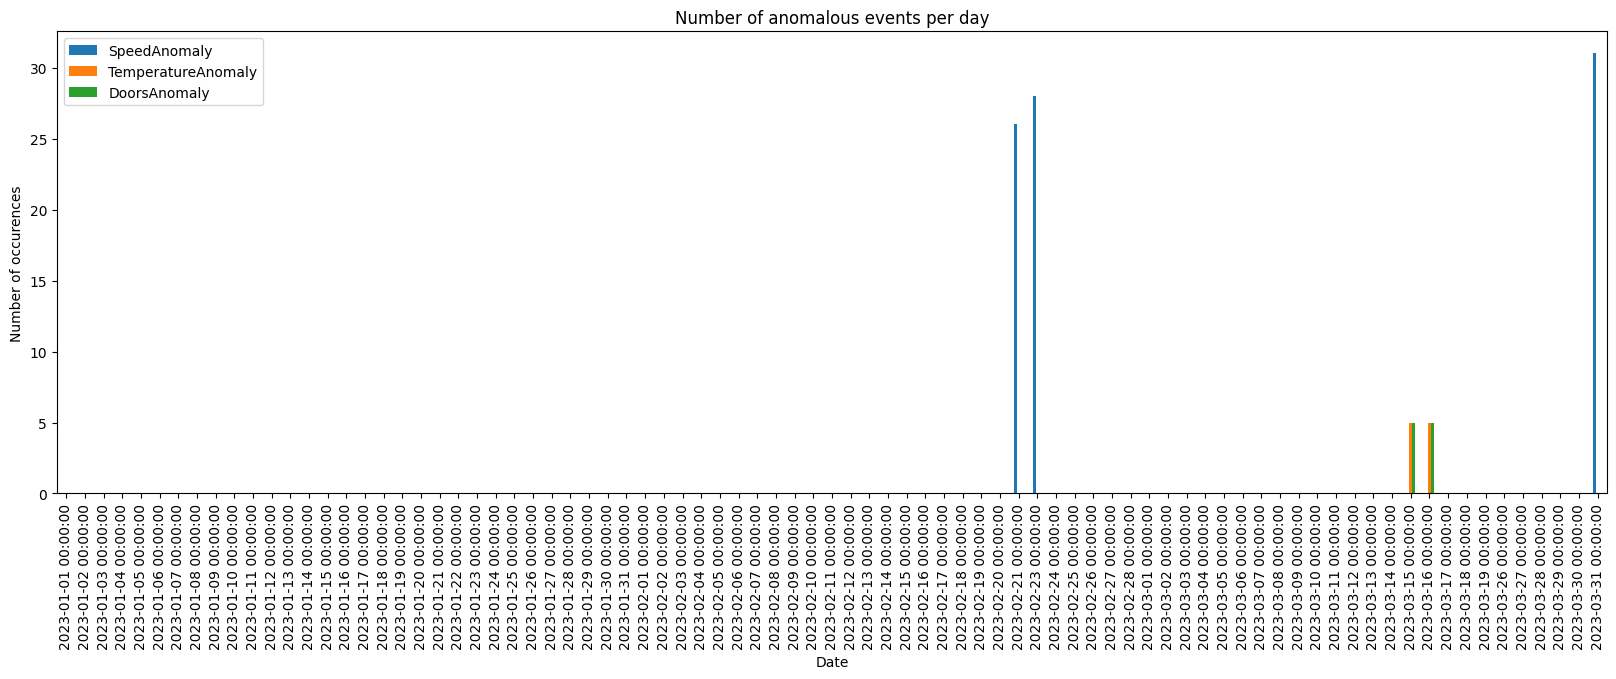

In [419]:
## Table 1
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    .pipe(check_speed_anomaly)
    .pipe(check_temperature_anomaly)
    .pipe(
        check_doors_anomaly, 
        coordinates={"LatitudeDeparture": 12.67214, "LongitudeDeparture": 108.06884, "LatitudeArrival": 10.38960, "LongitudeArrival": 107.08450},
        tolerance=0.000005
    )
    .groupby(["Date"])[["SpeedAnomaly", "TemperatureAnomaly", "DoorsAnomaly"]]
    .agg(["sum"])
    .droplevel(1, axis=1)
    .pipe(lambda df_: display(df_) or df_)
    .plot(
        kind="bar",
        xlabel="Date", 
        ylabel="Number of occurences",
        figsize=(20,6),
        title="Number of anomalous events per day"
    )
)
plt.show()

In [420]:
## Table 2
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    .pipe(check_speed_anomaly)
    .pipe(check_temperature_anomaly)
    .pipe(
        check_doors_anomaly, 
        coordinates={"LatitudeDeparture": 12.67214, "LongitudeDeparture": 108.06884, "LatitudeArrival": 10.38960, "LongitudeArrival": 107.08450},
        tolerance=0.000005
    )
    # .query("`SpeedAnomaly` == 1")
    # .query("'2023-03-16' == `Date`")
    # .groupby(["Date"])["SpeedAnomaly"]
    # .transform("sum")
)

,ID,Datetime,Date,Time,Latitude,Longitude,Speed,Temperature,Light,SpeedAnomaly,TemperatureAnomaly,DoorsAnomaly
0,xrlYlV1Pcv_vO_8n4JPyi,2023-01-01 14:00:00,2023-01-01,14:00:00,12.67214,108.06884,0.00,5.50,200,0,0,0
1,dkA2V7_H1L-ZewTbeJbQP,2023-01-01 14:13:30,2023-01-01,14:13:30,12.65841,108.03907,54.95,2.04,0,0,0,0
2,sfUc0dftAes27cZZ4112_,2023-01-01 14:27:00,2023-01-01,14:27:00,12.61997,107.95092,47.81,2.96,0,0,0,0
3,KLECMdIVRtZ6Yqs2lgWsN,2023-01-01 14:40:30,2023-01-01,14:40:30,12.58494,107.87112,60.87,2.45,0,0,0,0
4,ZMiTvOwYlM3bNEgkVy47p,2023-01-01 14:54:00,2023-01-01,14:54:00,12.54409,107.79773,43.06,2.17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2200,EuPgSWmLUnTNWUsrogwW8,2023-03-31 22:10:54,2023-03-31,22:10:54,10.48768,107.16279,51.93,2.04,0,0,0,0
2201,A0UuE-SYVjw-tW1kBGgqT,2023-03-31 22:20:43,2023-03-31,22:20:43,10.51021,107.09660,37.26,0.01,0,0,0,0
2202,AiNNqxc5csIY6mjs4Lm8Q,2023-03-31 22:30:32,2023-03-31,22:30:32,10.43127,107.15820,36.52,4.05,0,0,0,0
2203,2owKdI7zpINnlIUGChvJ0,2023-03-31 22:40:21,2023-03-31,22:40:21,10.39718,107.11183,86.67,3.50,0,1,0,0


The following function allows to get the dataframe of Table 1 from the dataframe of Table 2

In [421]:
def aggregate_rule_anomalies(data: pd.DataFrame) -> pd.DataFrame:
    """TODO describe function

        :param data:
        :returns:

    """
    return(
        data.copy()
        .groupby(["Date"])[["SpeedAnomaly", "TemperatureAnomaly", "DoorsAnomaly"]]
        .agg(["sum"])
        .droplevel(1, axis=1)
        .reset_index()
        .rename(
            columns={
                "SpeedAnomaly": "NumberSpeedAnomaly",
                "TemperatureAnomaly": "NumberTemperatureAnomaly",
                "DoorsAnomaly": "NumberDoorsAnomaly"
            }
        )
    )

## 8. Exploring "unknowns" using EDA
The objective here is to go further in the analysis and identify some anomalous behaviours using EDA.

The checks performed will be at date level to augment Table 1 above.

Each check is performed using a function that takes as input the transformed dataframe and return a the dataframe with a new column filled with 1 (Anomalous event) or 0 (Normal event)

### 8.1 Anomalous number of records
In 6.1, the reference number of records identified was 40 per date (94% of dates). 

```Dates with number of records > 40 can be flagged as anomalous```

In this section we will perform detailed analysis of each anomalous record date to understand what makes them anomalous

The following function allows adding results of record number check to Table 1

In [422]:
def check_number_of_record_anomaly(data: pd.DataFrame, initdf: pd.DataFrame) -> pd.DataFrame:
    """Add column with anomalies detected on record data

        :param data: input DataFrame
        :param initdf: initial transformed DataFrame
        :returns: DataFrame with additional column with results of check

    """
    tmp_df = (
        initdf
        .groupby(["Date"])["ID"]
        .agg(["count"])
        .reset_index()
        .assign(**{"count": lambda df_: df_["count"].apply(lambda x: True if x > 40 else False)})
        .rename(
            columns={
            "count": "TotalRecordsAnomaly"})
    )
    
    return (
        data.copy()
        .merge(
            tmp_df,
            on="Date",
            how="left"
        )
    )

Results below highlight 5 dates for which the number of records > 40 with corresponding number of records and trip duration

In [423]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    .pipe(check_speed_anomaly)
    .pipe(check_temperature_anomaly)
    .pipe(
        check_doors_anomaly, 
        coordinates={"LatitudeDeparture": 12.67214, "LongitudeDeparture": 108.06884, "LatitudeArrival": 10.38960, "LongitudeArrival": 107.08450},
        tolerance=0.000005
    )
    .pipe(aggregate_rule_anomalies)
    .pipe(
        check_number_of_record_anomaly, 
        initdf=prepare_data(pd.read_csv("../data/scenarios.csv"))
    )
    .query("`TotalRecordsAnomaly` == 1")
    .merge(
        prepare_data(pd.read_csv("../data/scenarios.csv"))
        .groupby(["Date"])["ID"]
        .agg(["count"]),
        on="Date",
        how="left"
    )
    .rename(
        columns={
        "count": "TotalRecords"
        }
    )
    .merge(
        prepare_data(pd.read_csv("../data/scenarios.csv"))
        .groupby(["Date"])[["Datetime"]]
        .agg(["first", "last"])
        .droplevel(0, axis=1)
        .assign(
            **{
                "TripDuration": lambda df_: (df_["last"] - df_["first"]).dt.total_seconds() / 60
            }
        ),
        on="Date",
        how="left"
    )
    # .query("`duration` != 526.5")
    .drop(
        ["first", "last"], axis=1
    )
)

,Date,NumberSpeedAnomaly,NumberTemperatureAnomaly,NumberDoorsAnomaly,TotalRecordsAnomaly,TotalRecords,TripDuration
0,2023-02-21,26,0,0,True,55,530.166667
1,2023-02-23,28,0,0,True,55,530.166667
2,2023-03-15,0,5,5,True,45,528.000000
3,2023-03-16,0,5,5,True,85,528.000000
4,2023-03-31,31,0,0,True,55,530.166667


The trip duration for reference dates (those with 40 records) is 526.5 minutes

Dates for which the number of records is anomalous correspond to those for which the trip duration is also anomalous.

The number of records increases with trip duration 

#### Trips with 55 records
For these trips, speed limit has been exceeded up to 50% of the trip and a detailed analysis highlights an anomalous route for the truck

In [424]:
def compare_trip_position(data: pd.DataFrame, dates: list) -> None:
    """TODO describe function

        :param data:
        :returns:

    """    
    fig, ax = plt.subplots(figsize=(12,6))
    for date in dates:
        ax.plot(
            data.query("@date == `Date`")["Latitude"], 
            data.query("@date == `Date`")["Longitude"], 
            label=date
        )
    ax.set_xlabel("Latitude")
    ax.set_ylabel("Longitude")
    ax.legend()
    plt.show()

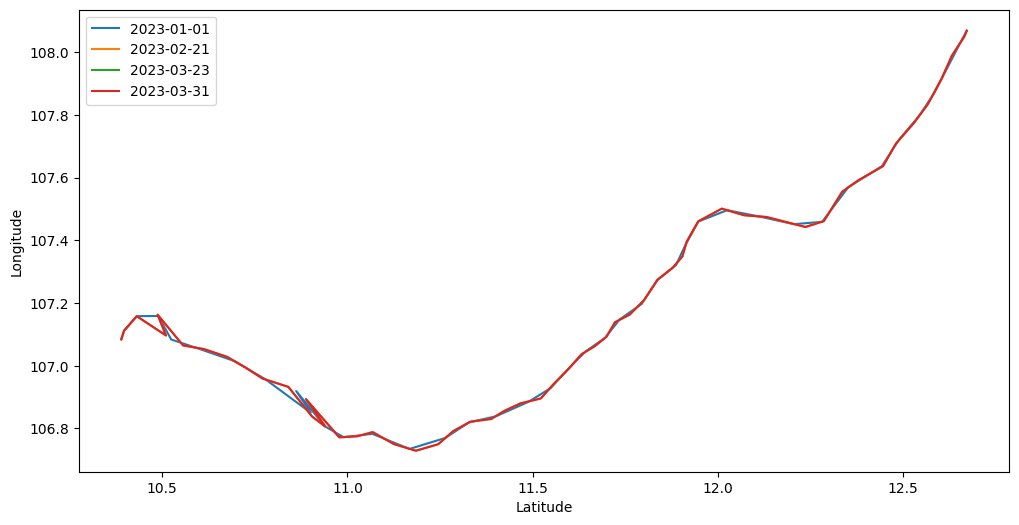

In [425]:
compare_trip_position(
    data=prepare_data(pd.read_csv("../data/scenarios.csv")), 
    dates=["2023-01-01", "2023-02-21", "2023-03-23", "2023-03-31"],
)

#### Trip with 45 records
For this trip, 5 events recorded that trailer doors have been opened and the temperature went above 6°C.

A detailed analysis highlights that the truck has stopped in the course of the trip (Speed = 0)

In [426]:
def compare_trip_coordinate(data: pd.DataFrame, dates: list) -> None:
    """TODO describe function

        :param data:
        :returns:

    """    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
    for date in dates:
        ax1.plot(
            [i for i in range(data.query("@date == `Date`").shape[0])],
            # data.query("@date == `Date`")["Latitude"], 
            data.query("@date == `Date`")["Latitude"], 
            label=date
        )
        ax2.plot(
        [i for i in range(data.query("@date == `Date`").shape[0])],
        # data.query("@date == `Date`")["Latitude"], 
        data.query("@date == `Date`")["Longitude"], 
        label=date
        )        
    ax1.set_ylabel("Latitude")
    ax2.set_ylabel("Longitude")
    ax1.legend()
    ax2.legend()
    plt.show()

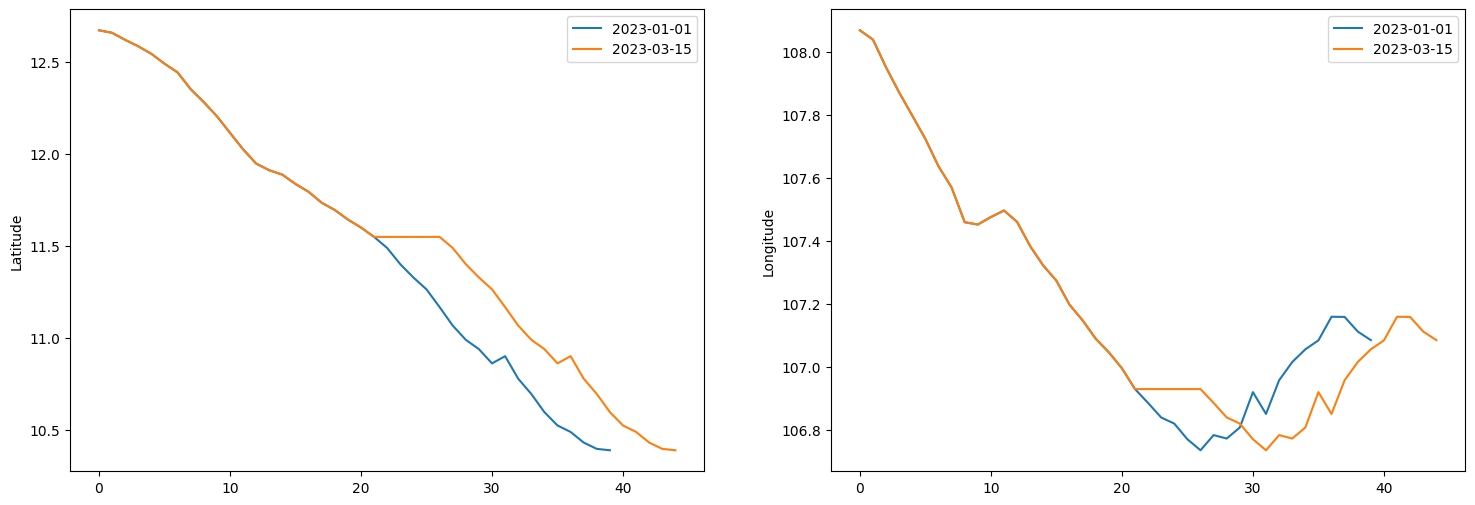

In [427]:
compare_trip_coordinate(
    data=prepare_data(pd.read_csv("../data/scenarios.csv")), 
    dates=["2023-01-01", "2023-03-15"],
)

#### Trip with 85 records
For this trip, a detailed analysis shows that it actually consists of 2 different trips:
- One reference trip with 40 records and reference measures
- One trip with 45 records.

This could mean a special date with two trucks BUT as they are no other similar dates, a meaning could also be a erroneous date, i.e. one of both trips corresponds to another date

### 8.2 Absence of records
Some dates are missing in the list of events

```Dates without records can be flagged as anomalous```

The function below adds a corresponding column with results of check


In [428]:
def check_no_record_anomaly(data: pd.DataFrame) -> pd.DataFrame:
    """Add column with anomalies detected on non existing records

        :param data: input DataFrame
        :returns: DataFrame with additional column with results of check

    """

    return (
        data.copy()
        .merge(
            pd.DataFrame({"Date": pd.date_range(start="1/1/2023", end="31/03/2023")}),
            on="Date",
            how="right"
        )
        .assign(
            **{
                "NoRecordAnomaly": lambda df_: df_["TotalRecordsAnomaly"].apply(lambda x: True if pd.isna(x) else False)
            }
        )
    )

Results show that 7 dates have no records with 6 consecutive dates in March

In [429]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    .pipe(check_speed_anomaly)
    .pipe(check_temperature_anomaly)
    .pipe(
        check_doors_anomaly, 
        coordinates={"LatitudeDeparture": 12.67214, "LongitudeDeparture": 108.06884, "LatitudeArrival": 10.38960, "LongitudeArrival": 107.08450},
        tolerance=0.000005
    )
    .pipe(aggregate_rule_anomalies)
    .pipe(
        check_number_of_record_anomaly, 
        initdf=prepare_data(pd.read_csv("../data/scenarios.csv"))
    )
    .pipe(check_no_record_anomaly)
    .query("`NoRecordAnomaly` == 1")
)

/tmp/ipykernel_1341/2047170340.py:12: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.DataFrame({"Date": pd.date_range(start="1/1/2023", end="31/03/2023")}),


,Date,NumberSpeedAnomaly,NumberTemperatureAnomaly,NumberDoorsAnomaly,TotalRecordsAnomaly,NoRecordAnomaly
52,2023-02-22,NaN,NaN,NaN,NaN,True
78,2023-03-20,NaN,NaN,NaN,NaN,True
79,2023-03-21,NaN,NaN,NaN,NaN,True
80,2023-03-22,NaN,NaN,NaN,NaN,True
81,2023-03-23,NaN,NaN,NaN,NaN,True
82,2023-03-24,NaN,NaN,NaN,NaN,True
83,2023-03-25,NaN,NaN,NaN,NaN,True


### 8.3 Absence of records
Some dates are missing in the list of events

```Dates without records can be flagged as anomalous```

The function below adds a corresponding column with results of check


## 9. Exploring "unknowns" using statistic methods and ML
The objective here is to go further in the analysis and identify some anomalous behaviours using advanced techniques.

Geo-based analysis

Time-based analysis

Statistic methods

>```Disclaimer: These first three analysis are just another way to get to the results already obtained above but with more visualization (using plotly)```

Anomaly detection on time series

Supervised and unsupervised ML

### 9.1 Statistic methods

<Axes: >

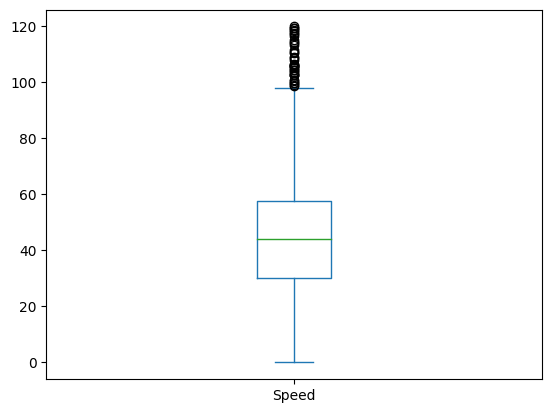

In [431]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))[["Speed"]]
    .plot(kind="box")
)

In [304]:
(
    prepare_data(pd.read_csv("../data/scenarios.csv"))
    # .query("`Date` == '2023-02-21'")
    # .plot(x="Time", y="Speed")
    .pivot_table(values='Speed', index='Date', columns='Time')
    .transpose()
    # .iloc[:, 0:1]
    # .dropna()
    # .plot(figsize=(12,6))
)

Date,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-07,2023-01-08,2023-01-09,2023-01-10,...,2023-03-16,2023-03-17,2023-03-18,2023-03-19,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31
Time,,,,,,,,,,,,,,,,,,,,,
14:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00
14:09:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.69
14:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14:13:30,54.95,60.74,68.35,49.42,34.46,60.78,43.92,34.09,55.81,52.81,...,32.68,51.43,40.47,54.32,23.4,49.73,25.5,42.87,48.34,NaN
14:19:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22:40:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.67
22:46:30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,NaN
